In [1]:
import pandas as pd
import numpy as np
#from datetime import datetime, timedelta, date, time
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline
# get directory address


# Intorudction 
Customer_Churn.csv is a dataset that contains information about customers of a telecommunications company and whether or not they have churned (i.e., stopped using the company's services). Each row in the dataset represents a single customer, and the columns provide information about the customer's account, services, and demographic characteristics. The dataset contains the following columns:

## 1.1 Load data from csv file

In [2]:
#df= pd.read_csv("/Users/waleedidrees/Dropbox/Python Projects/helpful code/classification_models/loan_train.csv")
df= pd.read_csv("Customer-Churn.csv")
df=df.rename(columns= lambda df_: str.lower(df_))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


except three columns all columns are string

In [3]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone se...,No,No,No phone se...,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [4]:
df =(
df.apply(lambda df_: df_.str.lower() if df_.dtype.name == 'object' else df_)
.assign(
    seniorcitizen= df.seniorcitizen.astype("bool"),
    tenure= df.tenure.astype("int8"),
    totalcharges= pd.to_numeric(df.totalcharges, errors="coerce"),    
)
#.dropna()
.assign(churn= lambda df_: (df_.churn == "yes").astype("int8"))
)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,5575-gnvde,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,3668-qpybk,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,9237-hqitu,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,False,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.50,0
7039,2234-xaduh,female,False,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card...,103.20,7362.90,0
7040,4801-jzazl,female,False,yes,yes,11,no,no phone se...,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic ...,29.60,346.45,0
7041,8361-ltmkd,male,True,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,74.40,306.60,1


# Drop loan id columns bcz its just a unique identifier

In [5]:
df = df.drop(columns=["customerid"]).rename(columns= {"churn" : "target"})
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1


In [6]:
target_variable= "target"
all_cols = df.drop(columns="target").columns.tolist()                      
cat_cols = df.drop(columns="target").select_dtypes(["object","category"]).columns.tolist()                      
num_cols= df.drop(columns="target").columns[~df.drop(columns="target").columns.isin(cat_cols)] 

# EDA

In [7]:
df.describe(include="all").round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043,2,False,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7043,2,no,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,no,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.4,24.6,0.0,9.0,29.0,55.0,72.0
phoneservice,7043,2,yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,3,no,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,3,no,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,3,no,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
target               0
dtype: int64

### 1.2 Exploratory Data Visualisations (EDA)

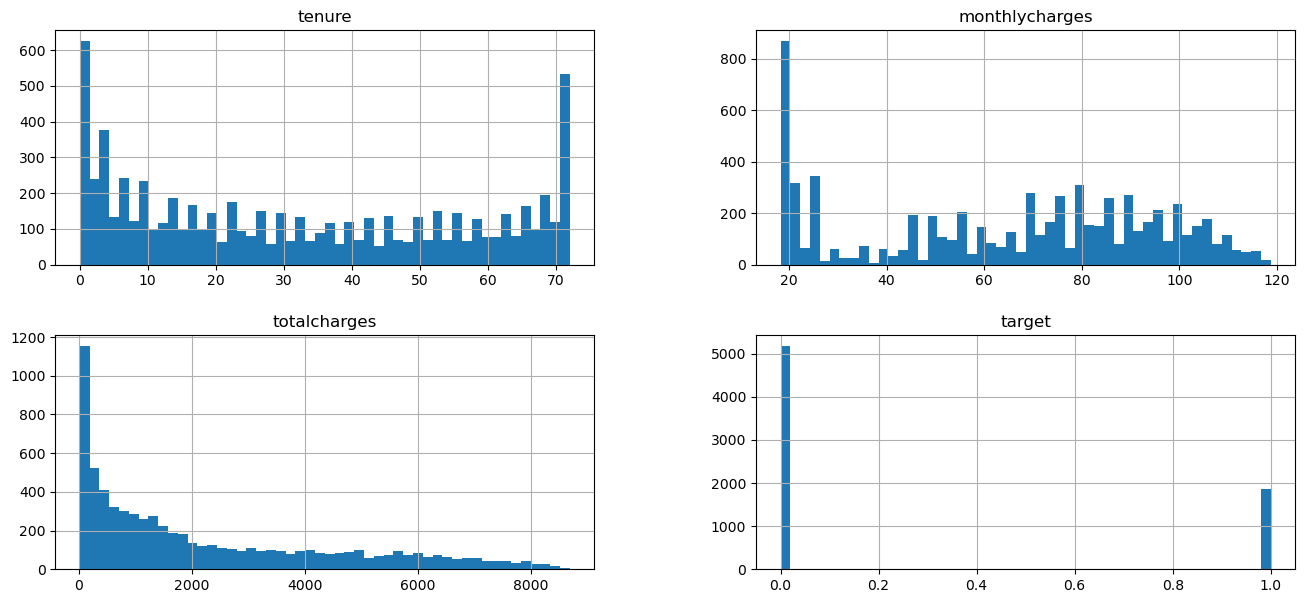

In [9]:
pd.options.plotting.backend = "matplotlib"
df.hist(
    bins=50, 
    figsize=(16,7)   
    )
plt.show()
pd.options.plotting.backend = "plotly"

the histogram shows the distribution of numeric variables , we see the seniorcitizen has quite high values so we will standardized these 
columns in preprocessing step. 

# Feature importance

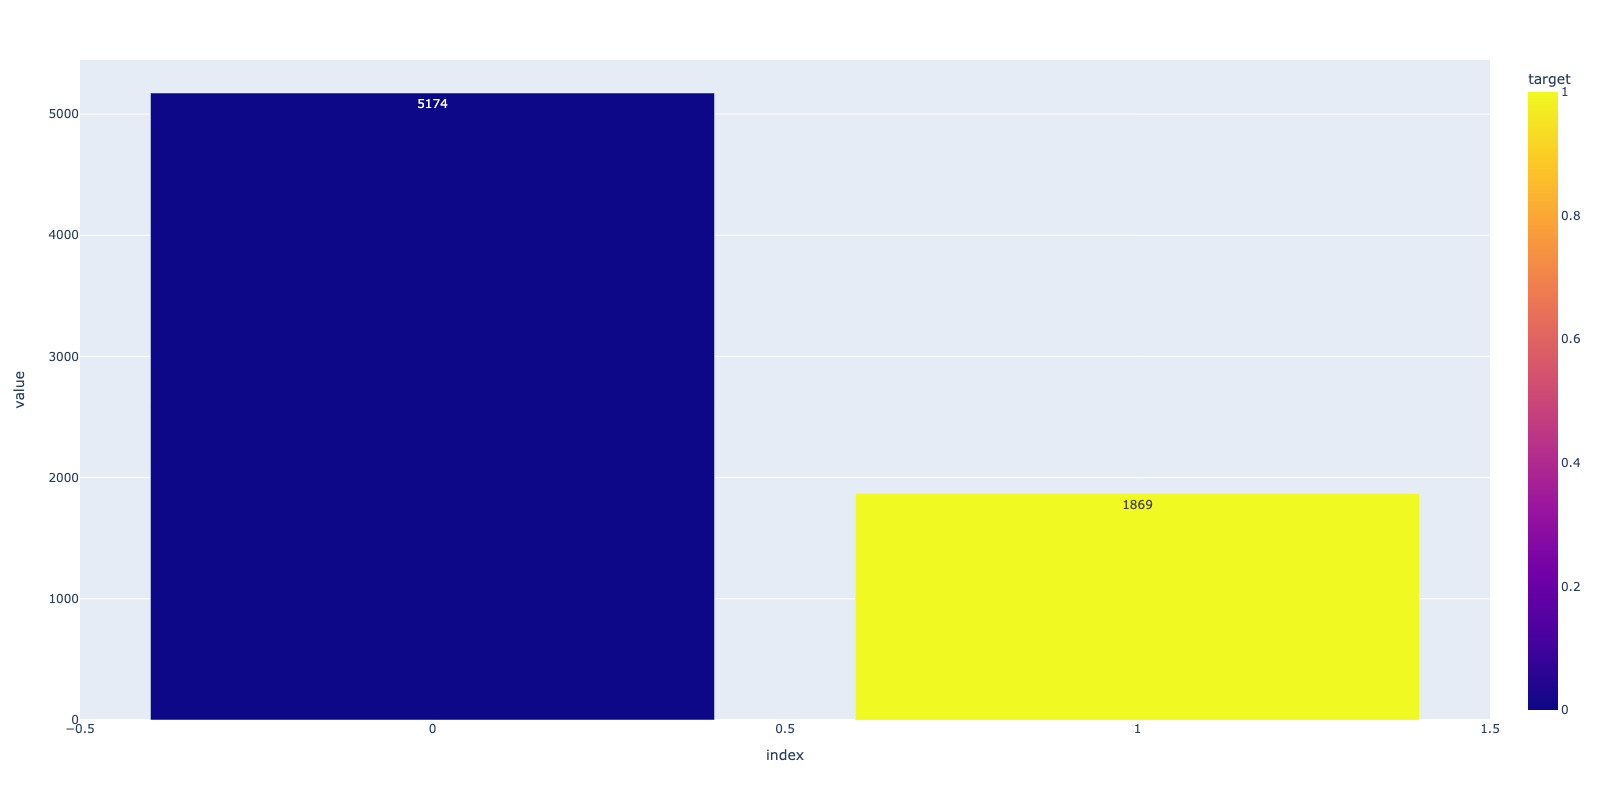

In [10]:
df.groupby(["target"]).agg(total = pd.NamedAgg("target", "count")).reset_index().plot.bar(
    color= "target", text_auto= True, width=1600, height= 800).show("png")

## graph below shows the count of churn and no churns gender, partner and senior citizen

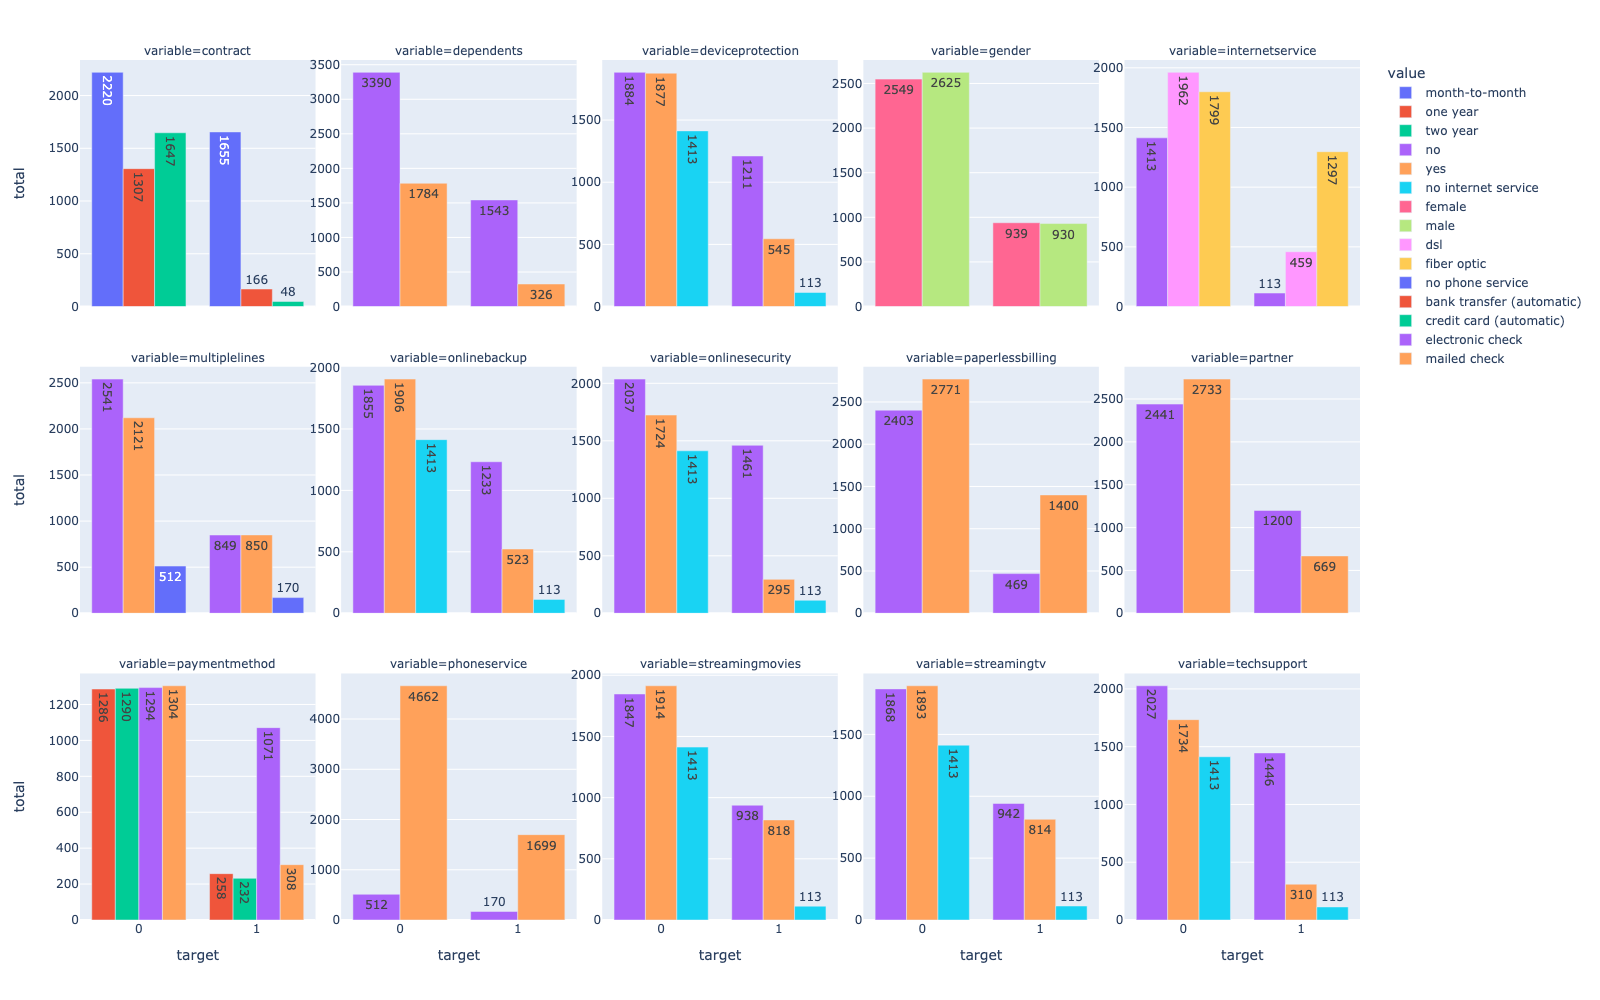

In [11]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["target", "variable", "value"])
    .agg(total = pd.NamedAgg( "target","count"))
    .reset_index()
    .plot.bar(x= "target", y= "total", color="value", facet_col="variable",facet_col_wrap= 5 ,  
     barmode= "group",width=1600, height= 1000, text_auto =True)
    .update_yaxes(matches =None,showticklabels=True)
    .update_xaxes(matches = None)    
).show("png")

From the plot above it seems like the gender feature is the least important as the the churn ratios are pretty much the same for male and female

# Catagorical Feature Importance
* For categorical variables, one such metric is mutual information, which tells how much information we learn about one variable if we learn the value of the other variable. It’s a concept from information theory, and in machine learning, we often use it to measure the mutual dependency between two variables. Higher values of mutual information mean a higher degree of dependence

In [12]:
from sklearn.metrics import mutual_info_score
feat_importance=[]
for x in cat_cols:
    imp= pd.DataFrame(
    {"feats": [x],
    "score": [mutual_info_score(df[x], df.target).round(2)]}
    )
    feat_importance.append(imp)

feat_imp_cat= pd.concat(feat_importance, axis=0).sort_values("score", ascending=False).reset_index(drop=True)
feat_imp_cat

,feats,score
0,contract,0.10
1,internetser...,0.06
2,onlinesecurity,0.06
3,techsupport,0.06
4,onlinebackup,0.05
5,deviceprote...,0.04
6,paymentmethod,0.04
7,streamingtv,0.03
8,streamingmo...,0.03
9,paperlessbi...,0.02


* we can ignore the variables with score lower then 0.1

In [13]:
feat_imp_cat= feat_imp_cat[feat_imp_cat.score <= 0.01]
cat_cols=feat_imp_cat.feats.values.tolist()
cat_cols

['partner', 'dependents', 'gender', 'phoneservice', 'multiplelines']

In [14]:
df=df.drop(columns= cat_cols)

# Look for correlation between all variables and target variable

<AxesSubplot: >

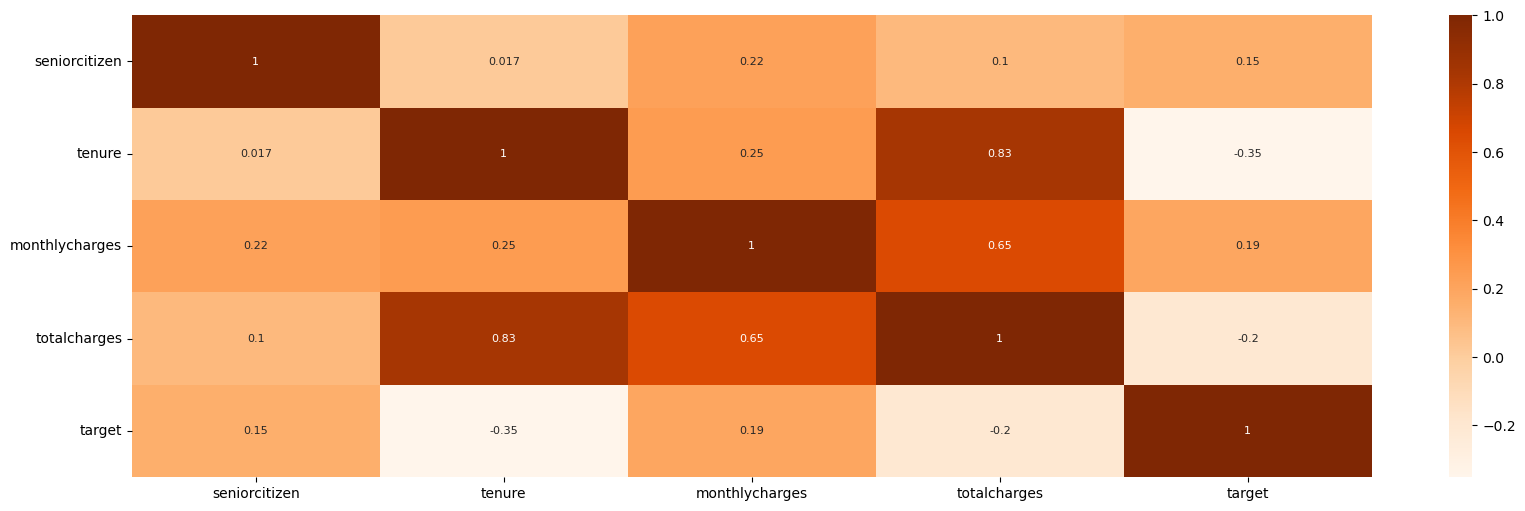

In [15]:
import seaborn as sns
df_cor= df.corr(numeric_only= True).round(3)
plt.figure(figsize=(20, 6))
sns.heatmap(df_cor, cmap= "Oranges" , annot=True, annot_kws={"fontsize":8})

All the numeric features have strong correlation and are important features for analysis

We will convert the data to all factors, as tree based models and linear models dont get effected by factor variables.

In [16]:
df[df.select_dtypes(["bool","object", "category"]).columns] = df.select_dtypes(["bool","object", "category"]).apply(lambda df_: pd.factorize(df_)[0])

## Impute missing Values

In [17]:
from my_imputer import MixImputer
df_final=  MixImputer(impute_missing=True).fit_transform(df)
df_final=df_final .reset_index(drop=True)
df_final.isna().sum()

seniorcitizen       0
tenure              0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
target              0
dtype: int64

Now We are set for preprocessing modelling

# Train/Test Split

We will split the data in train and test for the preprocessing and training the model.
We will use the stritification we that the ratio of classes stays the same between train and test set.

In [18]:
target_variable= "target"
df_x = df_final.drop(columns=target_variable)
df_y = df_final[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.3, stratify=df_y, random_state =42
    )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4930, 14), (4930,), (2113, 14), (2113,))

# Preprocess Data

In [19]:
# preprocess
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector 
# transformer/imputer/scaller/var filter
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

# Library Models/Metrics pipelines

In [20]:
# Import Models
from sklearn import linear_model ,tree, ensemble
import lightgbm
import xgboost
from catboost import CatBoostClassifier
# metric evaluation and cross validation
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Libraries GRID and sample split

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

># Preprocessor

In [22]:
# seperate columns
all_cols = X_train.columns.tolist()                      
cat_cols = X_train.select_dtypes(["object","category"]).columns.tolist()                      
num_cols= X_train.columns[~X_train.columns.isin(cat_cols)] 


num_pipe= Pipeline (
        steps =[
        ("std_scaler", StandardScaler()),        
        ("variance_filter", VarianceThreshold(threshold= 0.1)),        
                ]
                    )
cat_pipe= Pipeline (
        steps =[        
        ("one_hot", OneHotEncoder(sparse_output=False, drop= "first", handle_unknown= "ignore")),
        ("variance_filter", VarianceThreshold(threshold= 0.1)),
                ]
                    )

prep = ColumnTransformer(
    transformers= [      
        ("num", num_pipe, num_cols), 
        ("cat", cat_pipe, cat_cols),                      
        ],
        remainder="passthrough",        
n_jobs=-1,
).set_output(transform="pandas")

prep.fit_transform(X_train,y_train)


,num__seniorcitizen,num__tenure,num__internetservice,num__onlinesecurity,num__onlinebackup,num__deviceprotection,num__techsupport,num__streamingtv,num__streamingmovies,num__contract,num__paperlessbilling,num__paymentmethod,num__monthlycharges,num__totalcharges
5557,-0.438147,-1.114728,0.169878,-0.906627,0.178649,-1.007401,-0.915605,0.227907,-1.085390,-0.830916,1.205295,-1.146603,0.504286,-0.836568
2270,2.282338,-1.195884,0.169878,-0.906627,0.178649,0.279921,-0.915605,0.227907,-1.085390,-0.830916,-0.829672,-1.146603,0.724189,-0.907808
6930,-0.438147,-1.195884,0.169878,-0.906627,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,-0.829672,1.463967,0.337292,-0.909640
2257,-0.438147,1.117066,-1.187492,-0.906627,0.178649,0.279921,0.342809,0.227907,0.230315,0.367567,1.205295,1.463967,0.515860,1.110336
898,-0.438147,-0.830682,0.169878,0.349251,0.178649,-1.007401,0.342809,0.227907,0.230315,-0.830916,-0.829672,0.593777,1.122660,-0.515182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,-0.438147,1.238800,0.169878,0.349251,-1.172176,0.279921,0.342809,0.227907,-1.085390,0.367567,1.205295,1.463967,1.307841,1.871050
1488,-0.438147,-1.277041,-1.187492,0.349251,0.178649,-1.007401,-0.915605,-1.089307,-1.085390,-0.830916,1.205295,-0.276413,-0.453036,-0.981840
6303,-0.438147,1.563425,0.169878,-0.906627,-1.172176,0.279921,0.342809,0.227907,0.230315,1.566051,1.205295,-1.146603,1.464915,2.358299
2710,-0.438147,-0.343745,1.527247,1.605129,1.529474,1.567243,1.601223,1.545121,1.546021,0.367567,1.205295,1.463967,-1.473187,-0.793576


# Create function for valuation scores

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
def eval_scores(actuals, pred):
    res= pd.DataFrame({ 
    "accuracy": [accuracy_score(actuals, pred)], 
    "recall": [recall_score(actuals, pred)],
    "roc_auc": [roc_auc_score(actuals, pred)],
    "precision": [precision_score(actuals, pred)]})
    return res

# Make Stacked Classifier

In [24]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [
    ('lm',linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1, solver="lbfgs",  C=0.05, max_iter= 1000, random_state=1)),
    ("dt" , tree.DecisionTreeClassifier(class_weight= "balanced", random_state=1)),
    ('rf',ensemble.RandomForestClassifier(class_weight= "balanced",n_jobs= -1, random_state=1 )),
    ('lgb',lightgbm.LGBMClassifier(scale_pos_weight= 2.7, random_state=1)),
    ],
    final_estimator = lightgbm.LGBMClassifier(scale_pos_weight= 2.7, random_state=1))
pipe= Pipeline(steps=[(
                "preprocess", prep),                
                ('model', stack)
                            ])

pipe.fit(X_train,y_train)
eval_scores(y_test, pipe.predict(X_test)).T

,0
accuracy,0.737340
recall,0.721925
roc_auc,0.732419
precision,0.503731


In [25]:
pd.DataFrame( {
    "accurary": [0.750592], 
    "recall":	[0.795009], 
    "roc_auc": 	[0.764772] , 
    "precision":[0.519814]}).assign(model= "lgb" )

,accurary,recall,roc_auc,precision,model
0,0.750592,0.795009,0.764772,0.519814,lgb


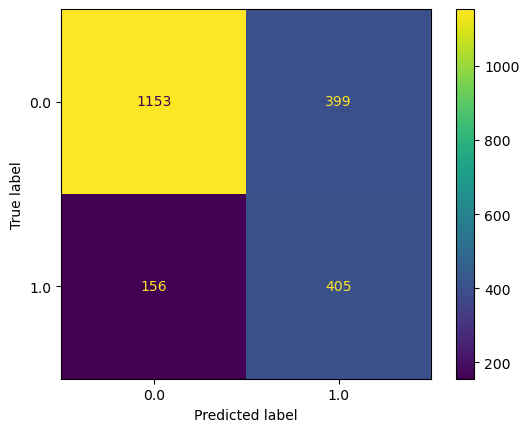

0.0    1552
1.0     561
Name: target, dtype: int64

In [26]:
stack_model= pipe
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,stack_model.predict(X_test), labels=stack_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= stack_model.classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

Text(0.5, 1.0, 'stack')

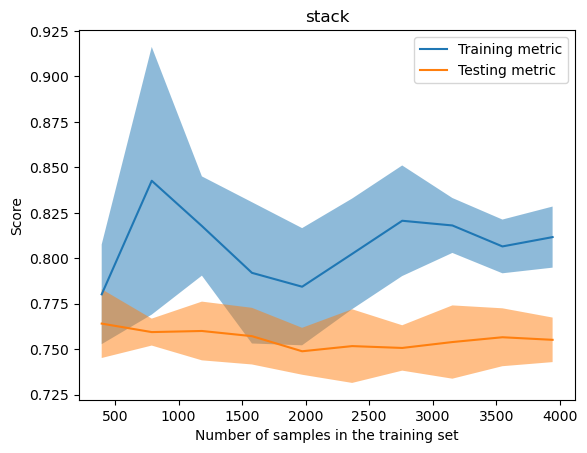

In [27]:
from sklearn.model_selection import LearningCurveDisplay
fig= LearningCurveDisplay.from_estimator(
    stack_model, X_train, y_train, cv=5, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
    )   
plt.title("stack")

In [28]:
from scipy.stats import randint, uniform, norm,reciprocal, expon, loguniform
from scipy.stats.distributions import randint, uniform

grid_solvers= ['saga']
grid_C=  uniform(0.009, 1)
grid_penalties= ['l2']


grid_n_estimator = randint(500, 900) 
max_features = ['sqrt']
grid_max_depth = randint(2,5) 

grid_learn=  uniform(0.01, .5)
grid_sample_split= randint(20,100)
grid_min_sample_leaves = randint(5, 50)
grid_num_leaves = randint(2,50)

fraction= uniform(0.5, .5)
grid_l2_lambda= uniform(7, 50)

In [29]:
MLA_params =  [{                     
        'model__lm__penalty' : grid_penalties,         
        'model__lm__solver' :grid_solvers,         
        'model__lm__max_iter': [10000],   
        'model__dt__max_depth': grid_max_depth, 
        'model__dt__max_features': max_features,   
        'model__dt__min_samples_leaf': grid_min_sample_leaves,                                    
        'model__rf__n_estimators': grid_n_estimator,  
        'model__rf__max_depth': grid_max_depth,         
        'model__rf__max_features': max_features,        
        'model__rf__min_samples_leaf': grid_min_sample_leaves,
        'model__rf__min_samples_split': grid_sample_split,    
        'model__lgb__learning_rate': grid_learn,
        'model__lgb__num_leaves': grid_num_leaves ,
        'model__lgb__min_data_in_leaf': grid_min_sample_leaves,               
        'model__lgb__max_depth': grid_max_depth,       
        'model__lgb__n_estimators': grid_n_estimator,                          
        'model__lgb__scale_pos_weight': [2.7], #[sample_weight[1]/sample_weight[0]]
        "model__lgb__lambda_l2": grid_l2_lambda,
        'model__final_estimator__learning_rate': grid_learn,
        'model__final_estimator__num_leaves': grid_num_leaves ,
        'model__final_estimator__min_data_in_leaf': grid_min_sample_leaves,               
        'model__final_estimator__max_depth': grid_max_depth,       
        'model__final_estimator__n_estimators': grid_n_estimator,                          
        'model__final_estimator__scale_pos_weight': [2.7], #[sample_weight[1]/sample_weight[0]]
        "model__final_estimator__lambda_l2": grid_l2_lambda,
         }]

# CV split

In [30]:
cv_split = StratifiedKFold(n_splits= 10, random_state=10 , shuffle=True)

In [31]:
grid_cv= RandomizedSearchCV(
    pipe,
    param_distributions = MLA_params,
    cv= cv_split,    
    scoring='roc_auc',
    n_iter = 150,
    refit = "f1",
    random_state=1,
    verbose= 0,
    n_jobs= 16 )
tune_grid =grid_cv.fit(X_train, y_train)
stack_model = tune_grid.best_estimator_
stack_model.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=16.313010568883545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16.313010568883545
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=16.313010568883545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16.313010568883545
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=16.313010568883545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=16.313010568883545
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=16.313010568883545, reg_lambda=0.0 will be ignored. Current value: lambd

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('variance_filter',
                                                                   VarianceThreshold(threshold=0.1))]),
                                                  Index(['seniorcitizen', 'tenure', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovie...
                                                 LGBMClassifier(lambda_l2=16.313010568883545,
                                                                learning_rate=0.18278036352152388,
                                                                max_depth=4,
                                                                min_data_in_leaf=30,
                                                                n_estimators=678,
                                                                num_leaves=22,
                                                                random_state=1,
                                                                scale_pos_weight=2.7))],
                                    final_estimator=LGBMClassifier(lambda_l2=43.0162246721079,
                                                                   learning_rate=0.010057187408672444,
                                                                   max_depth=3,
                                                                   min_data_in_leaf=20,
                                                                   n_estimators=644,
                                                                   num_leaves=3,
                                                                   random_state=1,
                                                                   scale_pos_weight=2.7)))])

In [32]:
pd.concat([eval_scores(y_test, stack_model.predict(X_test)).assign(model= "stacked_model"),
pd.DataFrame( {
    "accuracy": [0.750592],
    "recall":	[0.795009],
    "roc_auc": 	[0.764772],
    "precision":[0.519814]}).assign(model= "single_model" )])

,accuracy,recall,roc_auc,precision,model
0,0.752011,0.796791,0.766308,0.521587,stacked_model
0,0.750592,0.795009,0.764772,0.519814,single_model


There is a light imporvent in the accuracy, recal, roc_auc and precision but the improvment is not signficant. The data set is quite small results might see a bigger improvement on a bigger dataset.

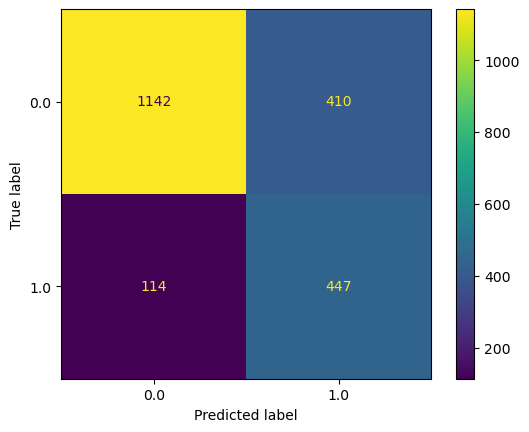

0.0    1552
1.0     561
Name: target, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,stack_model.predict(X_test), labels=stack_model["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= stack_model["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

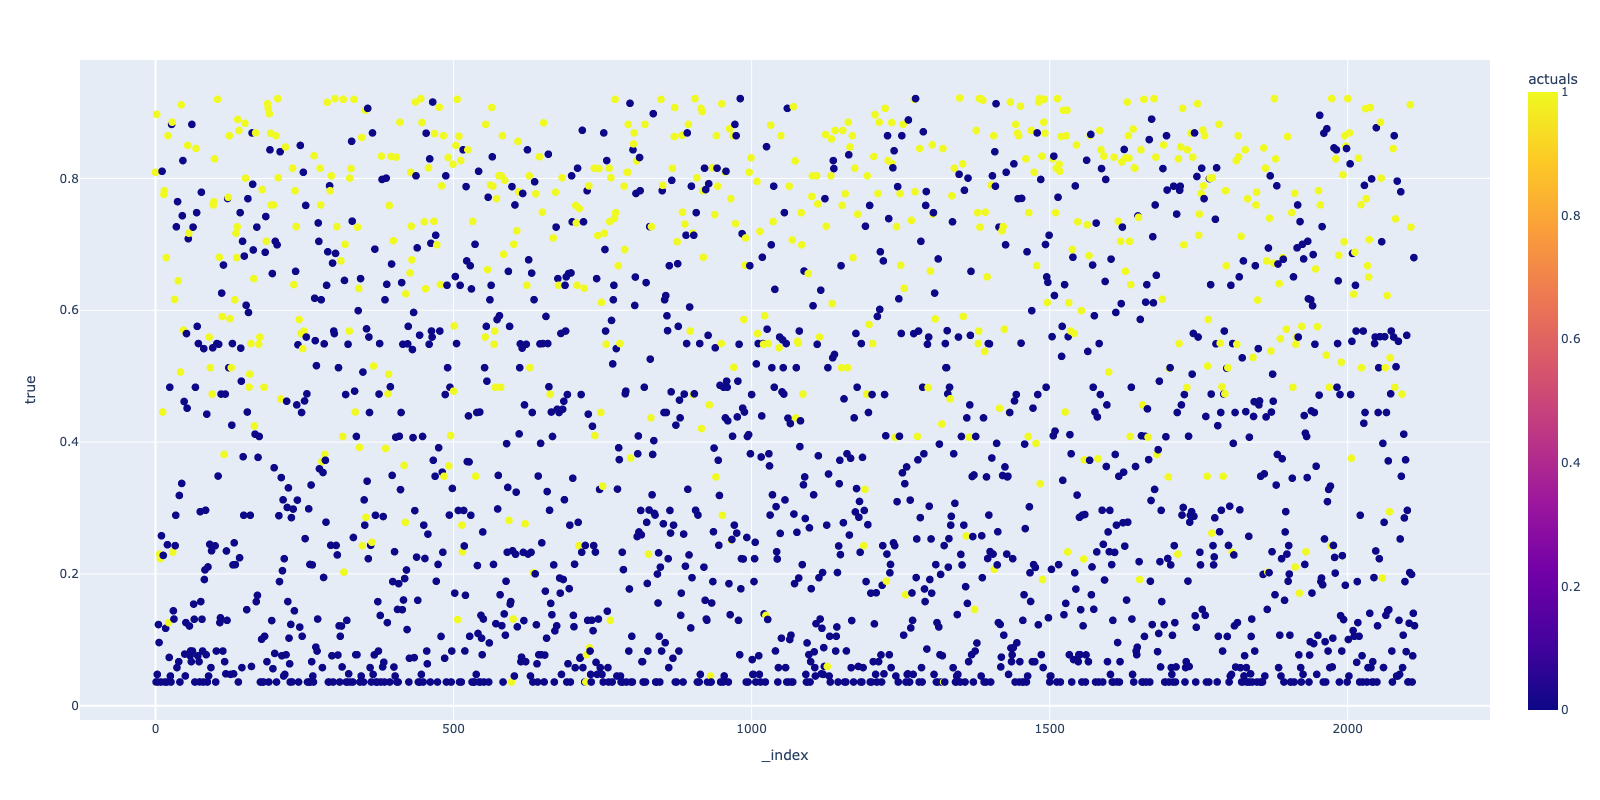

In [34]:
df_probs= pd.DataFrame(stack_model.predict_proba(X_test), columns= ["false", "true"] )

df_pred= pd.DataFrame({
    "predict":  stack_model.predict(X_test),
    "actuals": y_test,    
})
df_res=pd.concat(
[df_pred.reset_index(),
df_probs],
axis=1
)
pd.options.plotting.backend = "plotly"
(
        df_res
        .plot.scatter(
                y= "true",     
                x= df_res.index,    
                color= "actuals",                
                height= 800, width= 1600
                )
        .update_traces(marker=dict(size=8))

).show("png")